<a href="https://colab.research.google.com/github/smahesh2694/NEU_CLS-64/blob/master/xai_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install -q xlrd

In [0]:
 #!git clone https://smahesh2694:@github.com/smahesh2694/NEU_CLS-64.git

fatal: destination path 'NEU_CLS-64' already exists and is not an empty directory.


In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
input_sh = (200, 200, 3)

base_model=MobileNet(weights='imagenet',include_top=False, input_shape=input_sh)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '



17227776/17225924 [==============================] - 0s 0us/step


In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x) 
preds=Dense(9,activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.input, outputs=preds)

In [0]:
base_model.trainable = False #default

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True, 
                                 validation_split=0.2)

In [9]:
train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/NEU-CLS-64', 
                                                 target_size=(200,200),                                                                                                  batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')

Found 5792 images belonging to 9 classes.


In [10]:
val_generator=train_datagen.flow_from_directory('/content/drive/My Drive/NEU-CLS-64', 
                                                 target_size=(200,200),                                                                                                  batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 1444 images belonging to 9 classes.


In [11]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

In [0]:
model.summary()

In [13]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)
step_size_val=val_generator.n//val_generator.batch_size
print(step_size_val)

181
45


In [14]:
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=val_generator,
                   validation_steps=step_size_val,                
                   epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
181/181 [==============================] - 2064s 11s/step - loss: 0.4313 - acc: 0.8764 - val_loss: 3.7337 - val_acc: 0.3618
Epoch 2/20
181/181 [==============================] - 91s 504ms/step - loss: 0.2716 - acc: 0.9228 - val_loss: 0.9573 - val_acc: 0.7472
Epoch 3/20
181/181 [==============================] - 91s 502ms/step - loss: 0.2151 - acc: 0.9358 - val_loss: 1.0590 - val_acc: 0.7486
Epoch 4/20
181/181 [==============================] - 92s 508ms/step - loss: 0.1811 - acc: 0.9423 - val_loss: 0.3640 - val_acc: 0.8598
Epoch 5/20
181/181 [==============================] - 91s 505ms/step - loss: 0.1649 - acc: 0.9498 - val_loss: 0.5034 - val_acc: 0.8732
Epoch 6/20
181/181 [==============================] - 92s 507ms/step - loss: 0.1780 - acc: 0.9487 - val_loss: 0.5570 - val_acc: 0.8407
Epoch 7/20
181/181 [==============================] - 90s 498ms/step - loss: 0.1480 - acc: 0.954

In [15]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

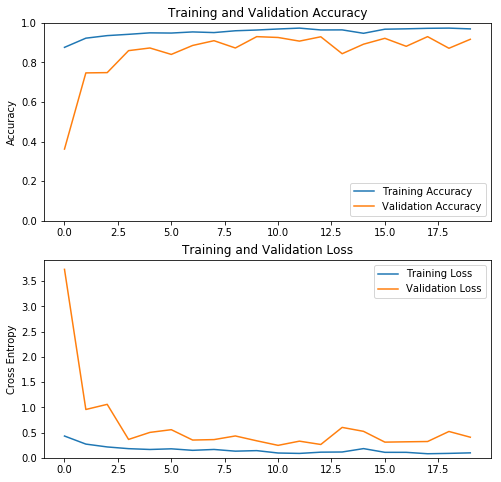

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/My Drive/xai_model/TV_AL_80_20_1.jpg')
plt.show()



In [0]:
model.save('/content/drive/My Drive/xai_model/model.h5')

In [0]:
model.save_weights('/content/drive/My Drive/xai_model/weights.h5')

In [0]:
#lm = load_model('/content/drive/My Drive/xai_model/model.h5')

In [0]:
#lm.summary()